In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
data = pd.read_csv("EURUSD  Polar Coordinates.csv")
data["UP DOWN"] = 0
data.loc[data["Close"] < data["Close"].shift(-1),"UP DOWN"] = 1
data

Time     Open     High      Low    Close         R  \
0     2012.04.01 00:00:00  1.33562  1.33757  1.33558  1.33566  1.888880   
1     2012.04.02 00:00:00  1.33565  1.33801  1.32781  1.33277  1.886859   
2     2012.04.03 00:00:00  1.33275  1.33670  1.32128  1.32223  1.877369   
3     2012.04.04 00:00:00  1.32222  1.32324  1.31069  1.31433  1.864331   
4     2012.04.05 00:00:00  1.31432  1.31636  1.30346  1.30620  1.852996   
...                   ...      ...      ...      ...      ...       ...   
3994  2025.01.26 00:00:00  1.04795  1.04853  1.04649  1.04675  1.481177   
3995  2025.01.27 00:00:00  1.04675  1.05331  1.04282  1.04370  1.478173   
3996  2025.01.28 00:00:00  1.04370  1.04566  1.04138  1.04272  1.475322   
3997  2025.01.29 00:00:00  1.04272  1.04436  1.03823  1.04247  1.474452   
3998  2025.01.30 00:00:00  1.04247  1.04675  1.03832  1.03969  1.472311   

         Theta  X Derivatie  Y Derivative  Theta Derivative  UP DOWN  
0     0.785413     -1.33566       1.33562           1.33562        0  
1     0.784319     -1.33277       1.33565           1.33565        0  
2     0.781436     -1.32223       1.33275           1.33275        0  
3     0.782406     -1.31433       1.32222           1.32222        0  
4     0.782300     -1.30620       1.31432           1.31432        1  
...        ...          ...           ...               ...      ...  
3994  0.784825     -1.04675       1.04795           1.04795        0  
3995  0.783939     -1.04370       1.04675           1.04675        0  
3996  0.784928     -1.04272       1.04370           1.04370        0  
3997  0.785278     -1.04247       1.04272           1.04272        0  
3998  0.784063     -1.03969       1.04247           1.04247        0  

[3999 rows x 11 columns]

In [149]:
data.loc[(data["R"] < data["R"].shift(-1)) & (data['Theta'] < data['Theta'].shift(-1)) & (data['Close'] > data['Close'].shift(-1))]

Empty DataFrame
Columns: [Time, Open, High, Low, Close, R, Theta, X Derivatie, Y Derivative, Theta Derivative, UP DOWN]
Index: []

In [150]:
data.loc[(data["R"] > data["R"].shift(-1)) & (data['Theta'] > data['Theta'].shift(-1)) & (data['Close'] < data['Close'].shift(-1))]

Empty DataFrame
Columns: [Time, Open, High, Low, Close, R, Theta, X Derivatie, Y Derivative, Theta Derivative, UP DOWN]
Index: []

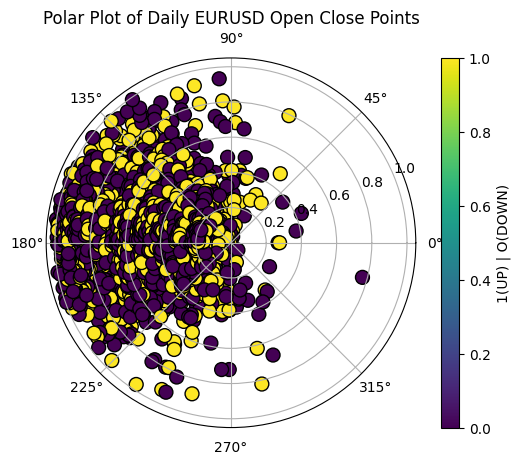

In [151]:
data['Theta_rescaled'] = (data['Theta'] - data['Theta'].min()) / (data['Theta'].max() - data['Theta'].min()) * (2 * np.pi)
data['R_rescaled'] = (data['R'] - data['R'].min()) / (data['R'].max() - data['R'].min()) 

# Create the polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Plot data points on the polar axis
ax.scatter(data['Theta_rescaled'], data['R_rescaled'],c=data["UP DOWN"], cmap='viridis', edgecolor='black', s=100)

# Add plot labels
ax.set_title("Polar Plot of Daily EURUSD Open Close Points")
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=ax, label='1(UP) | O(DOWN)')

plt.show()

In [116]:
data.isna().any()

Time                False
Open                False
High                False
Low                 False
Close               False
R                   False
Theta               False
X Derivatie         False
Y Derivative        False
Theta Derivative    False
UP DOWN             False
Theta_rescaled      False
R_rescaled          False
dtype: bool

In [117]:
LOOK_AHEAD = 1
data['R Target'] = data['R'].shift(-LOOK_AHEAD)
data['Theta Target'] = data['Theta'].shift(-LOOK_AHEAD)
data.dropna(inplace=True)
data.reset_index(drop=True,inplace=True)

In [122]:
#Let's entirely drop off the last 2 years of data
_ = data.iloc[-((365 * 2) + 230):,:]
data = data.iloc[:-((365 * 2) + 230),:]
data

Time     Open     High      Low    Close         R  \
0     2012.04.01 00:00:00  1.33562  1.33757  1.33558  1.33566  1.888880   
1     2012.04.02 00:00:00  1.33565  1.33801  1.32781  1.33277  1.886859   
2     2012.04.03 00:00:00  1.33275  1.33670  1.32128  1.32223  1.877369   
3     2012.04.04 00:00:00  1.32222  1.32324  1.31069  1.31433  1.864331   
4     2012.04.05 00:00:00  1.31432  1.31636  1.30346  1.30620  1.852996   
...                   ...      ...      ...      ...      ...       ...   
3033  2021.12.27 00:00:00  1.13235  1.13348  1.13030  1.13299  1.601837   
3034  2021.12.28 00:00:00  1.13299  1.13334  1.12898  1.13132  1.601109   
3035  2021.12.29 00:00:00  1.13133  1.13690  1.12739  1.13598  1.603234   
3036  2021.12.30 00:00:00  1.13598  1.13601  1.12987  1.13225  1.603883   
3037  2021.12.31 00:00:00  1.13225  1.13865  1.13035  1.13782  1.605187   

         Theta  X Derivatie  Y Derivative  Theta Derivative  UP DOWN  \
0     0.785413     -1.33566       1.33562           1.33562        0   
1     0.784319     -1.33277       1.33565           1.33565        0   
2     0.781436     -1.32223       1.33275           1.33275        0   
3     0.782406     -1.31433       1.32222           1.32222        0   
4     0.782300     -1.30620       1.31432           1.31432        1   
...        ...          ...           ...               ...      ...   
3033  0.785681     -1.13299       1.13235           1.13235        0   
3034  0.784661     -1.13132       1.13299           1.13299        1   
3035  0.787449     -1.13598       1.13133           1.13133        0   
3036  0.783754     -1.13225       1.13598           1.13598        1   
3037  0.787852     -1.13782       1.13225           1.13225        0   

      Theta_rescaled  R_rescaled  R Target  Theta Target  
0           3.048140    0.866895  1.886859      0.784319  
1           2.799631    0.863590  1.877369      0.781436  
2           2.144887    0.848071  1.864331      0.782406  
3           2.365131    0.826750  1.852996      0.782300  
4           2.341041    0.808215  1.849312      0.786507  
...              ...         ...       ...           ...  
3033        3.108900    0.397497  1.601109      0.784661  
3034        2.877245    0.396306  1.603234      0.787449  
3035        3.510498    0.399780  1.603883      0.783754  
3036        2.671282    0.400842  1.605187      0.787852  
3037        3.601969    0.402974  1.607685      0.785851  

[3038 rows x 15 columns]

In [123]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,TimeSeriesSplit,cross_val_score

In [124]:
tscv = TimeSeriesSplit(n_splits=5,gap=LOOK_AHEAD)

In [125]:
X = data.columns[1:-5]
y = data.columns[-2:]

In [126]:
X

Index(['Open', 'High', 'Low', 'Close', 'R', 'Theta', 'X Derivatie',
       'Y Derivative', 'Theta Derivative'],
      dtype='object')

In [127]:
train , test = train_test_split(data,test_size=0.5,shuffle=False)

In [128]:
train_X = train.loc[:,X]
train_y = train.loc[:,y]

test_X = test.loc[:,X]
test_y = test.loc[:,y]

In [129]:
mean_scores = train_X.mean()
std_scores = train_X.std()

In [130]:
train_X = ((train_X - mean_scores) / std_scores)
test_X = ((test_X - mean_scores) / std_scores)

In [131]:
model = GradientBoostingRegressor()

In [132]:
results = pd.DataFrame(index=["Train","Test"],columns=["GBR"])

In [133]:
results.iloc[0,0] = np.mean(np.abs(cross_val_score(model,train_X,train_y["R Target"],cv=tscv)))
results.iloc[1,0] = np.mean(np.abs(cross_val_score(model,test_X,test_y["R Target"],cv=tscv)))
results

GBR
Train  0.76686
Test   0.89129

In [134]:
results.iloc[0,0] = np.mean(np.abs(cross_val_score(model,train_X,train_y["Theta Target"],cv=tscv)))
results.iloc[1,0] = np.mean(np.abs(cross_val_score(model,test_X,test_y["Theta Target"],cv=tscv)))
results

GBR
Train  0.368166
Test   0.110126

Preparing To Export To ONNX

In [135]:
import onnx
import skl2onnx 
from skl2onnx.common.data_types import FloatTensorType

In [136]:
r_model = GradientBoostingRegressor()
theta_model = GradientBoostingRegressor()

In [137]:
mean_scores = data.loc[:,X].mean()
std_scores = data.loc[:,X].std()

mean_scores.to_csv("EURUSD Polar Coordinates Mean.csv")
std_scores.to_csv("EURUSD Polar Coordinates Std.csv")

In [138]:
data

Time     Open     High      Low    Close         R  \
0     2012.04.01 00:00:00  1.33562  1.33757  1.33558  1.33566  1.888880   
1     2012.04.02 00:00:00  1.33565  1.33801  1.32781  1.33277  1.886859   
2     2012.04.03 00:00:00  1.33275  1.33670  1.32128  1.32223  1.877369   
3     2012.04.04 00:00:00  1.32222  1.32324  1.31069  1.31433  1.864331   
4     2012.04.05 00:00:00  1.31432  1.31636  1.30346  1.30620  1.852996   
...                   ...      ...      ...      ...      ...       ...   
3033  2021.12.27 00:00:00  1.13235  1.13348  1.13030  1.13299  1.601837   
3034  2021.12.28 00:00:00  1.13299  1.13334  1.12898  1.13132  1.601109   
3035  2021.12.29 00:00:00  1.13133  1.13690  1.12739  1.13598  1.603234   
3036  2021.12.30 00:00:00  1.13598  1.13601  1.12987  1.13225  1.603883   
3037  2021.12.31 00:00:00  1.13225  1.13865  1.13035  1.13782  1.605187   

         Theta  X Derivatie  Y Derivative  Theta Derivative  UP DOWN  \
0     0.785413     -1.33566       1.33562           1.33562        0   
1     0.784319     -1.33277       1.33565           1.33565        0   
2     0.781436     -1.32223       1.33275           1.33275        0   
3     0.782406     -1.31433       1.32222           1.32222        0   
4     0.782300     -1.30620       1.31432           1.31432        1   
...        ...          ...           ...               ...      ...   
3033  0.785681     -1.13299       1.13235           1.13235        0   
3034  0.784661     -1.13132       1.13299           1.13299        1   
3035  0.787449     -1.13598       1.13133           1.13133        0   
3036  0.783754     -1.13225       1.13598           1.13598        1   
3037  0.787852     -1.13782       1.13225           1.13225        0   

      Theta_rescaled  R_rescaled  R Target  Theta Target  
0           3.048140    0.866895  1.886859      0.784319  
1           2.799631    0.863590  1.877369      0.781436  
2           2.144887    0.848071  1.864331      0.782406  
3           2.365131    0.826750  1.852996      0.782300  
4           2.341041    0.808215  1.849312      0.786507  
...              ...         ...       ...           ...  
3033        3.108900    0.397497  1.601109      0.784661  
3034        2.877245    0.396306  1.603234      0.787449  
3035        3.510498    0.399780  1.603883      0.783754  
3036        2.671282    0.400842  1.605187      0.787852  
3037        3.601969    0.402974  1.607685      0.785851  

[3038 rows x 15 columns]

In [139]:
data[X] = ((data.loc[:,X] - mean_scores) / std_scores)

C:\Users\Westwood\AppData\Local\Temp\ipykernel_7840\3807495636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[X] = ((data.loc[:,X] - mean_scores) / std_scores)


In [140]:
data

Time      Open      High       Low     Close         R  \
0     2012.04.01 00:00:00  1.613358  1.596006  1.652599  1.614799  1.614698   
1     2012.04.02 00:00:00  1.613687  1.600832  1.567462  1.583112  1.599024   
2     2012.04.03 00:00:00  1.581902  1.586462  1.495913  1.467545  1.525432   
3     2012.04.04 00:00:00  1.466491  1.438812  1.379878  1.380924  1.424324   
4     2012.04.05 00:00:00  1.379905  1.363342  1.300659  1.291782  1.336429   
...                   ...       ...       ...       ...       ...       ...   
3033  2021.12.27 00:00:00 -0.614528 -0.642763 -0.596660 -0.607395 -0.611238   
3034  2021.12.28 00:00:00 -0.607513 -0.644299 -0.611124 -0.625706 -0.616884   
3035  2021.12.29 00:00:00 -0.625707 -0.605248 -0.628545 -0.574611 -0.600410   
3036  2021.12.30 00:00:00 -0.574742 -0.615010 -0.601372 -0.615509 -0.595375   
3037  2021.12.31 00:00:00 -0.615624 -0.586051 -0.596112 -0.554436 -0.585265   

         Theta  X Derivatie  Y Derivative  Theta Derivative  UP DOWN  \
0     0.012606    -1.614799      1.613358          1.613358        0   
1    -0.486319    -1.583112      1.613687          1.613687        0   
2    -1.800835    -1.467545      1.581902          1.581902        0   
3    -1.358656    -1.380924      1.466491          1.466491        0   
4    -1.407020    -1.291782      1.379905          1.379905        1   
...        ...          ...           ...               ...      ...   
3033  0.134591     0.607395     -0.614528         -0.614528        0   
3034 -0.330496     0.625706     -0.607513         -0.607513        1   
3035  0.940871     0.574611     -0.625707         -0.625707        0   
3036 -0.744003     0.615509     -0.574742         -0.574742        1   
3037  1.124516     0.554436     -0.615624         -0.615624        0   

      Theta_rescaled  R_rescaled  R Target  Theta Target  
0           3.048140    0.866895  1.886859      0.784319  
1           2.799631    0.863590  1.877369      0.781436  
2           2.144887    0.848071  1.864331      0.782406  
3           2.365131    0.826750  1.852996      0.782300  
4           2.341041    0.808215  1.849312      0.786507  
...              ...         ...       ...           ...  
3033        3.108900    0.397497  1.601109      0.784661  
3034        2.877245    0.396306  1.603234      0.787449  
3035        3.510498    0.399780  1.603883      0.783754  
3036        2.671282    0.400842  1.605187      0.787852  
3037        3.601969    0.402974  1.607685      0.785851  

[3038 rows x 15 columns]

In [141]:
r_model.fit(data.loc[:,X],data.loc[:,'R Target'])

GradientBoostingRegressor()

In [142]:
theta_model.fit(data.loc[:,X],data.loc[:,'Theta Target'])

GradientBoostingRegressor()

In [143]:
initial_types = [("float_input",FloatTensorType([1,len(X)]))]

In [144]:
r_model_proto = skl2onnx.convert_sklearn(r_model,initial_types=initial_types,target_opset=12)
theta_model_proto = skl2onnx.convert_sklearn(theta_model,initial_types=initial_types,target_opset=12)

In [145]:
onnx.save(r_model_proto,"EURUSD D1 R Model.onnx")
onnx.save(theta_model_proto,"EURUSD D1 Theta Model.onnx")